<a href="https://colab.research.google.com/github/Sushant-10-k/Weblytic_Lab_Traffic_prediction/blob/main/Weblytic__Labs__Traffic_Prediction_Tool_(ML_Focused).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

#Generate sample data
numpoints = 350
timestamps = pd.date_range(start = '2025-05-10', periods = numpoints,freq ='D')
traffic = np.random.normal(1000,250,numpoints)

#Create dataframe
df = pd.DataFrame({'timestamp': timestamps, 'traffic': traffic})

# Feature engineering
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Dayofweek'] = df['timestamp'].dt.dayofweek



In [8]:
#splitting data into training and testing sets
train_size = int(0.8* len(df))
train,test = df[:train_size],df[train_size:]

# define feature and target
features = ['Year','Month','Day','Dayofweek']
target = 'traffic'
x_train,y_train = train[features],train[target]
x_test,y_test = test[features],test[target]

In [9]:
# create and train the random forest regression model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [10]:
# make prediction
y_pred = model.predict(x_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 77728.95245577238


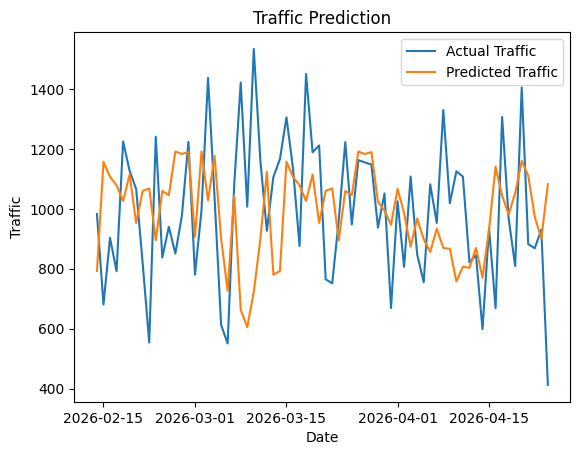

In [12]:
# plot the predictions
plt.plot(test['timestamp'],y_test,label = 'Actual Traffic')
plt.plot(test['timestamp'],y_pred,label = 'Predicted Traffic')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Prediction')
plt.show()